<a href="https://colab.research.google.com/github/gittEze/RumorClassifier_SocialMediaDataset/blob/main/Clasificaci%C3%B3n_de_Rumores_en_Redes_Sociales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

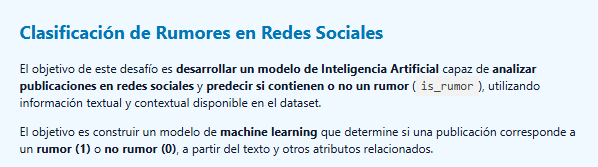

In [2]:
import pandas as pd

df = pd.read_csv('dataset_train_val.csv')
df.head()

,text,is_rumor,user.handle,topic
0,@korikisulda listen. Hey are protesting agains...,0.0,vida_andras,charliehebdo
1,“@TheEyeOfControl: Americans are 8 times more ...,1.0,SoulBrothaIII,ferguson
2,@Israel @IsraelMFA #Itsallaboutisrael (We kil...,0.0,mdp4202,NaN
3,@matwilson6 @capetownbrown Always do.,0.0,scottsmith349,ferguson
4,"@TomGauthey I'm out of date already of course,...",0.0,CMHarkey,charliehebdo


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59322 entries, 0 to 59321
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         59322 non-null  object 
 1   is_rumor     59320 non-null  float64
 2   user.handle  59320 non-null  object 
 3   topic        47196 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


,0
text,0
is_rumor,2
user.handle,2
topic,12126


In [4]:
#Eliminación de los datos null en las columnas is_rumor y user.handle

df.dropna(subset = ['is_rumor'], inplace=True)
df.dropna(subset = ['user.handle'], inplace=True)
df.isnull().sum()

,0
text,0
is_rumor,0
user.handle,0
topic,12126


In [5]:
df.drop(columns=['topic'], inplace=True)
df.isnull().sum()

,0
text,0
is_rumor,0
user.handle,0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['is_rumor'], test_size=0.10)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizador = CountVectorizer()
X_train_vec = vectorizador.fit_transform(X_train)
X_test_vec = vectorizador.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X_train_vec, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
df_test = pd.read_csv('dataset_test_sin_etiqueta.csv')
df_test.isnull().sum()

,0
text,0
user.handle,0
topic,651
ID,0


In [13]:
df_test.drop(columns=['topic'], inplace=True)
df_test.isnull().sum()

,0
text,0
user.handle,0
ID,0


In [14]:
nueva = df_test['text']
X_nueva = vectorizador.transform(nueva)
predict = modelo.predict(X_nueva)

df_test['etiqueta'] = predict

output = pd.DataFrame({'ID': df_test['ID'], 'etiqueta': predict})
output.to_csv('submission3.csv', index=False)